In [1]:
# Import libraries and dependencies
from copy import deepcopy
from typing import Tuple, List, Dict

from cluster.cluster import CustomCluster
from configurations.default_values import (
    DefaultQueries,
    DefaultShodanValues,
    DefaultValues,
)
from handlers.files_handler import FilesHandler
from handlers.shodan_handler import ShodanHandler
from helpers.tools import Tools
from parsers.http_parser import HttpParser

In [2]:
# Create cluster
raw_results = FilesHandler().open_results(filename=DefaultValues.DATA_FILE)
http_parser = HttpParser(
    process_cookie=True,
    process_trash_headers=True,
    remove_digits=True,
    remove_special=True,
)
prepared_results = Tools.process_data(deepcopy(raw_results), http_parser)

cluster = CustomCluster(prepared_results)
cluster.prepare_matrix()

Calculate results for 1 clusters
Calculate results for 2 clusters
Calculate results for 3 clusters
Calculate results for 4 clusters
Calculate results for 5 clusters
Calculate results for 6 clusters
Calculate results for 7 clusters
Calculate results for 8 clusters
Calculate results for 9 clusters


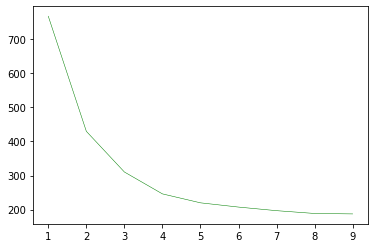

In [3]:
# Determine quantity of cluster with the Elbow method
cluster.determine_k(k_range=(1, 10))

In [4]:
# Use value obtained with the Elbow method, for example, from 3 to 5
cluster.make_cluster(clusters_q=5)

Current cluster: 0
['kbn', 'xpack', 'sig', 'cache', 'content', 'accept', 'encoding', 'vary', 'kibana', 'alive', 'version', 'bytes', 'ranges', 'control', 'type', 'charset', 'utf', 'randomvaluedate', 'date', 'text']
Current cluster: 1
['envoy', 'upstream', 'service', 'time', 'express', 'powered', 'istio', 'randomvaluelastmodified', 'etag', 'public', 'modified', 'randomvalueetag', 'age', 'max', 'content', 'server', 'utf', 'charset', 'accept', 'bytes']
Current cluster: 2
['randomvalueexpires', 'expires', 'gunicorn', 'close', 'randomvalueetag', 'etag', 'randomvaluelastmodified', 'modified', 'public', 'age', 'max', 'content', 'server', 'charset', 'utf', 'control', 'cache', 'randomvaluecontentlength', 'ok', 'type']
Current cluster: 3
['kbn', 'cache', 'content', 'accept', 'version', 'kibana', 'vary', 'encoding', 'alive', 'bytes', 'ranges', 'randomvaluecontentlength', 'control', 'ok', 'text', 'date', 'randomvaluedate', 'type', 'utf', 'charset']
Current cluster: 4
['undefined', 'kbn', 'xpack', '

In [5]:
# Print example samples from clusters
print(" ---\nExamples from clusters directly\n --- ")
direct_examples = {}
for class_name, class_hosts in raw_results.items():
    for host_data in class_hosts:
        processed_host = http_parser.process_headers(host_data)
        cluster_index = cluster.predict(processed_host)[0]
        if cluster_index not in direct_examples.keys():
            direct_examples[cluster_index] = []
        else:
            direct_examples[cluster_index].append(
                {"class_name": class_name, "data": host_data}
            )
direct_examples = {
    key: direct_examples[key] for key in sorted(direct_examples.keys())
}
for index, hosts in direct_examples.items():
    print(f"Cluster [{index}]:")
    for host in hosts[:5]:
        print(
            host.get("class_name"), f"[{index}]", "\t - \t", repr(host.get("data"))
        )

 ---
Examples from clusters directly
 --- 
Cluster [0]:
kibana content-length: 217 [0] 	 - 	 'HTTP/1.1 200 OK\r\nkbn-name: kibana\r\nkbn-version: 6.3.2\r\nkbn-xpack-sig: 5848fb4b2ce9ae3165947b2fd68ee15d\r\ncache-control: no-cache\r\ncontent-type: text/html; charset=utf-8\r\ncontent-length: 217\r\naccept-ranges: bytes\r\nvary: accept-encoding\r\nDate: Thu, 19 Mar 2020 18:35:39 GMT\r\nConnection: keep-alive\r\n\r\n'
kibana content-length: 217 [0] 	 - 	 'HTTP/1.1 200 OK\r\nkbn-name: kibana\r\nkbn-version: 6.2.3\r\nkbn-xpack-sig: b32d689ffa8cedcdb4ab879cd91bb690\r\ncache-control: no-cache\r\ncontent-type: text/html; charset=utf-8\r\ncontent-length: 217\r\naccept-ranges: bytes\r\nvary: accept-encoding\r\nDate: Thu, 19 Mar 2020 17:44:31 GMT\r\nConnection: keep-alive\r\n\r\n'
kibana content-length: 217 [0] 	 - 	 'HTTP/1.1 200 OK\r\nkbn-name: kibana\r\nkbn-version: 6.3.0\r\nkbn-xpack-sig: 84d56b47ba5ee583a8a8511986a9e7fa\r\ncache-control: no-cache\r\ncontent-type: text/html; charset=utf-8\r\nc